# Preprocessing

Resize images, combine into batches and store as numpy arrays for less overhead

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import textdataset as ds

In [11]:
from importlib import reload
reload(ds)

<module 'dataset' from '/Users/atadenizaydin/Documents/course material/cs491/nino-server/seg/dataset.py'>

In [12]:
%%time
iam = ds.IAMDataset('words', '/Users/atadenizaydin/Documents/course material/cs491/SimpleHTR/data',
                   msb=True, tabulate=True, sort=True)

CPU times: user 37 s, sys: 1.01 s, total: 38 s
Wall time: 43.9 s


In [13]:
s = iam.samlist[10]

In [14]:
a = cv2.imread(s.path, cv2.IMREAD_GRAYSCALE)

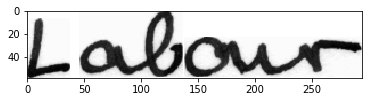

In [15]:
plt.imshow(a, cmap='gray')

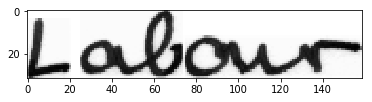

In [16]:
w = int(a.shape[1] / a.shape[0] * 32)
a = cv2.resize(a, (w, 32))
plt.imshow(a, cmap='gray')

In [17]:
widths = [s.w / s.h * 32 for s in iam.samlist]
widths = np.array(widths)

(array([1.8940e+04, 3.1727e+04, 2.3179e+04, 1.2280e+04, 5.7700e+03,
        2.5770e+03, 1.1540e+03, 4.4700e+02, 2.1700e+02, 7.0000e+01,
        3.1000e+01, 2.3000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00,
        1.0000e+00]),
 array([  2.28571429,  33.74285714,  65.2       ,  96.65714286,
        128.11428571, 159.57142857, 191.02857143, 222.48571429,
        253.94285714, 285.4       , 316.85714286, 348.31428571,
        379.77142857, 411.22857143, 442.68571429, 474.14285714,
        505.6       ]),
 <a list of 16 Patch objects>)

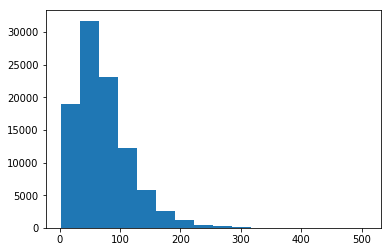

In [21]:
plt.hist(widths, bins=16)

In [46]:
rwidths = [np.ceil(2*s.w/s.h)*16 for s in iam.samlist] # shouldn't have images of width 0
rwidths = np.array(rwidths)

In [47]:
from scipy.linalg import norm
norm(rwidths - widths) / widths.size

0.02887057138538865

In [48]:
np.abs(rwidths - widths).max()

15.914438502673796

In [49]:
indices = np.argsort(rwidths)

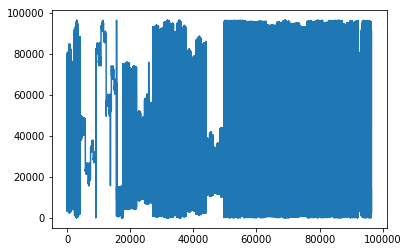

In [50]:
plt.plot(indices)
plt.show()

In [51]:
vals, inds, cnts = np.unique(rwidths, return_inverse=True, return_counts=True)

In [52]:
vals

array([ 16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160., 176.,
       192., 208., 224., 240., 256., 272., 288., 304., 320., 336., 352.,
       368., 384., 400., 416., 432., 448., 464., 480., 512.])

In [56]:
cnts

array([ 4031, 13672, 16008, 15996, 13493, 10438,  7342,  5146,  3507,
        2334,  1533,  1037,   678,   443,   281,   155,   124,    79,
          47,    23,    18,    17,    10,     4,     5,     4,     1,
           1,     1,     1,     1])

In [58]:
inds[:20]

array([ 1,  8,  2,  4,  4, 10,  4,  8,  3,  9,  9,  5,  6,  1,  2,  3, 12,
        2,  3,  7])

In [59]:
vals[inds][:20]

array([ 32., 144.,  48.,  80.,  80., 176.,  80., 144.,  64., 160., 160.,
        96., 112.,  32.,  48.,  64., 208.,  48.,  64., 128.])

In [60]:
rwidths[:20]

array([ 32., 144.,  48.,  80.,  80., 176.,  80., 144.,  64., 160., 160.,
        96., 112.,  32.,  48.,  64., 208.,  48.,  64., 128.])

In [61]:
np.all(vals[np.sort(inds)] == np.sort(rwidths))

True

In [62]:
sinds = np.argsort(inds)
[widths[i] for i in sinds[:20]]

[8.727272727272727,
 16.0,
 15.157894736842104,
 14.829268292682928,
 14.0,
 12.8,
 8.347826086956522,
 14.76923076923077,
 15.36,
 12.549019607843137,
 9.142857142857142,
 8.205128205128204,
 12.444444444444445,
 14.222222222222221,
 16.0,
 12.0,
 15.272727272727273,
 14.31578947368421,
 6.4,
 12.19047619047619]

In [79]:
b = []
for i in sinds[5000:5010]:
    a = cv2.imread(iam.samlist[i].path, cv2.IMREAD_GRAYSCALE)
    a = cv2.resize(a, (int(rwidths[i]), 32))
    b.append(a)
b = np.array(b)

In [84]:
np.array(list(map(lambda s: s.h, iam.samlist))).shape

(96430,)

In [88]:
r = np.arange(rwidths.shape[0], dtype='int64')
bs = np.array_split(r[:cnts[0]], cnts[0]//20)

In [110]:
sum(b.shape[0] for b in bs)

4031

In [105]:
cs = np.array_split(sinds, np.cumsum(cnts[:-1]))

In [106]:
np.array([c.shape[0] for c in cs])

array([ 4031, 13672, 16008, 15996, 13493, 10438,  7342,  5146,  3507,
        2334,  1533,  1037,   678,   443,   281,   155,   124,    79,
          47,    23,    18,    17,    10,     4,     5,     4,     1,
           1,     1,     1,     1])

In [107]:
cnts

array([ 4031, 13672, 16008, 15996, 13493, 10438,  7342,  5146,  3507,
        2334,  1533,  1037,   678,   443,   281,   155,   124,    79,
          47,    23,    18,    17,    10,     4,     5,     4,     1,
           1,     1,     1,     1])

In [91]:
len(bs)

201

In [80]:
b.shape

(10, 32, 32)

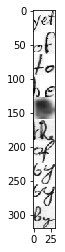

In [81]:
plt.imshow(b.reshape(-1, 32), cmap='gray')

In [114]:
iam.topdir

'/Users/atadenizaydin/Documents/course material/cs491/SimpleHTR/data'

In [120]:
import os
os.mkdir('%s/%s' % (iam.topdir, 'train'))
os.mkdir('%s/%s/%s' % (iam.topdir, 'train', iam.datatype))
os.mkdir('%s/%s/%s/%d' % (iam.topdir, 'train', iam.datatype, 1))

In [121]:
np.save('%s/%s/%s/%d/%d-%d.npy' % (iam.topdir, 'train', iam.datatype, 1, 1, 1), b)

In [122]:
b1 = np.load('%s/%s/%s/%d/%d-%d.npy' % (iam.topdir, 'train', iam.datatype, 1, 1, 1))

In [123]:
np.all(b==b1)

True

In [ ]:
rwidths = np.array(list(map(self.normalize_width, iam.samlist)))
vals, inds, cnts = np.unique(rwidths, return_inverse=True, return_counts=True)
sinds = np.argsort(inds)
# divide indices into sections of same width, then divide into batches online
cs = np.array_split(sinds, np.cumsum(cnts[:-1]))

In [63]:
def concatpath(topdir, subdir):
    return '%s/%s' % (topdir[:-1] if topdir[-1] == '/' else topdir, subdir)

In [135]:
class WordTrainSample(ds.TextSample):
    def __init__(self, path, fname, text, lengths):
        super(WordTrainSample, self).__init__(path, fname, text)
        self.lengths = lengths # 1d array of lengths of each text

In [186]:
class IAMTrainDataset(ds.Dataset):
    def __init__(self, iam, subdir, batchsiz, verbose=False, msb=True, tabulate=True, sort=True):
        super(IAMTrainDataset, self).__init__(iam.topdir, msb, tabulate, sort)
        self.topdir = '%s/%s/%s' % (iam.topdir, subdir, iam.datatype)
        assert iam.sort
        self.batchsiz = batchsiz # max size of each batch
        
        # first sort iam by rounded width, gather indices in sinds for each batch
        rwidths = np.array(list(map(self.normalize_width, iam.samlist)))
        vals, inds, cnts = np.unique(rwidths, return_inverse=True, return_counts=True)
        sinds = np.argsort(inds)
        # divide indices into sections of same width, then divide into batches online
        cs = np.array_split(sinds, np.cumsum(cnts[:-1]))
        
        # iterate through each batch, open each image, resize and collect in array
        # save array for each batch as well as ground truth array
        self.mkdir('%s/%s' % (iam.topdir, subdir))
        self.mkdir(self.topdir)
        for i, c in enumerate(cs):
            cdir = '%s/c%d' % (self.topdir, i)
            nbs = cnts[i]//batchsiz+1 # possibly modify batch size based on width
            self.mkdir(cdir)
            if verbose:
                print('Processing %d batches of %d images of width %d (%d/%d)' % \
                      (nbs, cnts[i], vals[i], i+1, cnts.shape[0]))
            bs = np.array_split(c, nbs)
            for j, b in enumerate(bs):
                # create new batch (i,j)
                
                # collect all images, create new array
                arr = []
                texts = ''
                lens = []
                for k in b:
                    text = iam.samlist[k].text
                    if text[-1] == '\n':
                        text = text[:-1]
                    texts += text
                    lens.append(len(text))
                    a = cv2.imread(iam.samlist[k].path, cv2.IMREAD_GRAYSCALE)
                    if a is None:
                        if verbose:
                            print('Could not read %s' % iam.samlist[k].fname)
                        continue
                    a = cv2.resize(a, (int(rwidths[k]), 32))
                    arr.append(a)
                arr = np.array(arr)
                lens = np.array(lens, dtype='int32')
                
                # create file
                # affix ground truth array to batch (new subclass of sample)
                fname = '%d-%d' % (i, j)
                path = '%s/%s.npy' % (cdir, fname)
                self.add_sample(WordTrainSample(path, fname, texts, lens)) # , fname.split('-'))
                
                # save array in subfolder i of self.topdir
                np.save(path, arr) # can also save to npz
        
        self.sort_samples(msb, tabulate, sort)
    
    def normalize_width(self, sam):
        return np.ceil(2*sam.w/sam.h)*16 # rework to minimize distance while avoiding 0 width
    
    def mkdir(self, path):
        try:
            os.mkdir(path)
        except FileExistsError:
            pass

In [205]:
%%time
iamtr = IAMTrainDataset(iam, 'train', 50, verbose=True)

Processing 81 batches of 4031 images of width 16 (1/31)
Processing 274 batches of 13672 images of width 32 (2/31)
Processing 321 batches of 16008 images of width 48 (3/31)
Processing 320 batches of 15996 images of width 64 (4/31)
Processing 270 batches of 13493 images of width 80 (5/31)
Processing 209 batches of 10438 images of width 96 (6/31)
Could not read a01-117-05-02
Processing 147 batches of 7342 images of width 112 (7/31)
Processing 103 batches of 5146 images of width 128 (8/31)
Processing 71 batches of 3507 images of width 144 (9/31)
Processing 47 batches of 2334 images of width 160 (10/31)
Could not read r06-022-03-05
Processing 31 batches of 1533 images of width 176 (11/31)
Processing 21 batches of 1037 images of width 192 (12/31)
Processing 14 batches of 678 images of width 208 (13/31)
Processing 9 batches of 443 images of width 224 (14/31)
Processing 6 batches of 281 images of width 240 (15/31)
Processing 4 batches of 155 images of width 256 (16/31)
Processing 3 batches of 

In [209]:
samb = iamtr.samlist[1000]

In [210]:
samb

Sample('3-299')

In [211]:
bb = np.load(samb.path)

In [212]:
bb.shape

(50, 32, 64)

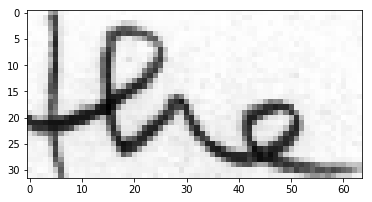

In [213]:
plt.imshow(bb[40], cmap='gray')
plt.show()

In [214]:
samb.text

'saybodyherrealturnsWestforbackmakingwithsuchtalentsfeelingshisdropwiththeLittletheweinlastAndthepreparedOfficeinofanytheyearmeetinginhepieceNato.peoplePaulthatthelogicaltheirthenotthethiskindcapturedback'

In [215]:
samb.lengths

array([3, 4, 3, 4, 5, 4, 3, 4, 6, 4, 4, 7, 8, 3, 4, 4, 3, 6, 3, 2, 2, 4,
       3, 3, 8, 6, 2, 2, 3, 3, 4, 7, 2, 2, 5, 4, 1, 6, 4, 4, 3, 7, 5, 3,
       3, 3, 4, 4, 8, 4], dtype=int32)

In [219]:
len(iam.samlist)

96430

In [234]:
reload(ds)

<module 'dataset' from '/Users/atadenizaydin/Documents/course material/cs491/nino-server/seg/dataset.py'>

In [235]:
%%time
iam1 = ds.IAMDataset('words', '/Users/atadenizaydin/Documents/course material/cs491/SimpleHTR/data',
                   msb=True, tabulate=True, sort=True)

CPU times: user 36.1 s, sys: 1.6 s, total: 37.7 s
Wall time: 41.4 s
